<font size=6><b> Lec05. 합성곱신경망(CNN:Convolution NN)

* ref : https://www.tensorflow.org/?hl=ko
* ref : https://keras.io/ko/
* ref : https://keras.io/api/layers/core_layers/dense/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

# Data Load

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 전처리 & 가공

## Flatten
* 이미지 픽셀 (28*28) : 행렬(2D) --> arr(1D)

In [5]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [6]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)


## 정규화(픽셀값 스케일링)
* 0 ~ 255 픽셀값을 0 ~1 값으로 변경
* MinMaxScaler()

In [7]:
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test / 255.0

# 모델 (Neural Network, FC)
* <font color=red size=5><b>X_train : (60000, 784), input_dim=784

## 모델&학습

In [8]:
X_train_scaler.shape, y_train.shape

((60000, 784), (60000,))

In [9]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal  #Xavier

In [10]:
model = Sequential()
model.add(Dense(units=300, input_dim=784, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 60)                6060      
                                                                 
 dense_3 (Dense)             (None, 10)                610       
                                                                 
Total params: 272,270
Trainable params: 272,270
Non-trainable params: 0
_________________________________________________________________


In [12]:
fit_hisroty = model.fit(X_train_scaler, y_train
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test)  )

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3174 - accuracy: 0.9077 - val_loss: 0.1510 - val_accuracy: 0.9563
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1159 - accuracy: 0.9653 - val_loss: 0.1022 - val_accuracy: 0.9684
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0765 - accuracy: 0.9770 - val_loss: 0.1041 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0545 - accuracy: 0.9828 - val_loss: 0.0887 - val_accuracy: 0.9727
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0940 - val_accuracy: 0.9727
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0298 - accuracy: 0.9903 - val_loss: 0.1004 - val_accuracy: 0.9728
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.0982 - val_accuracy: 0.9743
Epoch 

## 평가 시각화

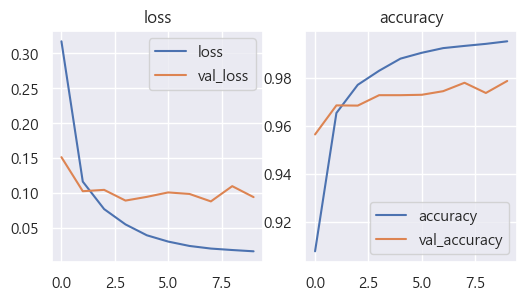

In [13]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 합성곱신경망(CNN)
* CNN(Convolution Neural Network)
* ref : https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

<img src="https://codetorial.net/tensorflow/_images/convolutional_neural_network_05.png" width=700>

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width=700>

<pre>
<b>tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    activation=None,
    kernel_initializer='glorot_uniform', </b>
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    use_bias=True,
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

<b>tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid"</b>, data_format=None, **kwargs
)


In [14]:
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
from keras.initializers import GlorotNormal  #Xavier

<b> 가중치 초기화 </b>
<pre>
LOCAL.ALL_OBJECTS["ConstantV2"] = initializers_v2.Constant
LOCAL.ALL_OBJECTS["GlorotNormalV2"] = initializers_v2.GlorotNormal
LOCAL.ALL_OBJECTS["GlorotUniformV2"] = initializers_v2.GlorotUniform
LOCAL.ALL_OBJECTS["HeNormalV2"] = initializers_v2.HeNormal
LOCAL.ALL_OBJECTS["HeUniformV2"] = initializers_v2.HeUniform
LOCAL.ALL_OBJECTS["IdentityV2"] = initializers_v2.Identity
LOCAL.ALL_OBJECTS["LecunNormalV2"] = initializers_v2.LecunNormal
LOCAL.ALL_OBJECTS["LecunUniformV2"] = initializers_v2.LecunUniform
LOCAL.ALL_OBJECTS["OnesV2"] = initializers_v2.Ones
LOCAL.ALL_OBJECTS["OrthogonalV2"] = initializers_v2.Orthogonal
LOCAL.ALL_OBJECTS["RandomNormalV2"] = initializers_v2.RandomNormal
LOCAL.ALL_OBJECTS["RandomUniformV2"] = initializers_v2.RandomUniform
LOCAL.ALL_OBJECTS["TruncatedNormalV2"] = initializers_v2.TruncatedNormal
LOCAL.ALL_OBJECTS["VarianceScalingV2"] = initializers_v2.VarianceScaling
LOCAL.ALL_OBJECTS["ZerosV2"] = initializers_v2.Zeros
    

## FC vs CNN

<pre>
* FC  total param : 272,270  (0.977)  (60000, 784)
* CNN total param :  33,750  (0.990)  (60000, 28,28,1)

* <b>reshape 연습</b>
    * np.expand_dims(X_train, axis=0).shape
    * X_train[..., np.newaxis].shape
    * X_train[..., None].shape

In [15]:
arr = np.arange(78400)

arr = arr.reshape(-1,28,28)        #(100, 28, 28)  
print(arr.shape)                   

# -----------------------------------------------
# (100, 28, 28)  --> (100, 784) 
# -----------------------------------------------
re_arr = arr.reshape(-1, 28*28)    
print(re_arr.shape  )

# -----------------------------------------------
#(100, 784) --> (100, 28,28,1)
# -----------------------------------------------
re_re_arr = re_arr.reshape(-1, 28, 28 ,1)
print( re_re_arr.shape )


(100, 28, 28)
(100, 784)
(100, 28, 28, 1)


* <font color=red size=5><b> (60000, 28, 28) --> (60000, 784)
* input_dim=784
* input_shape=(28,28)    

In [16]:
# model = Sequential()
# model.add(Dense(units=300,  input_dim=784, activation='relu', kernel_initializer='glorot_normal')) #입력층
# model.add(Dense(units=100,  activation='relu'))              #히든레이어
# model.add(Dense(units=60,  activation='relu'))              #히든레이어
# model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
# model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
# model.summary()

* <font color=red size=5><b> (60000, 28, 28) --> (60000, 28,28,1)
* input_shape = (28,28,1)   

In [17]:
# (X_train,y_train), (X_test,y_test) = mnist.load_data()
# X_train.shape, y_train.shape, X_test.shape, y_test.shape
# # ((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* <font color=red size=5><b> (60000, 784) --> (60000, 28,28,1)  input_shape=(28,28,1)
* input_shape = (28,28,1)   

In [18]:
X_train_scaler.shape,  X_test_scaler.shape

((60000, 784), (10000, 784))

In [19]:
X_train_scaler = X_train_scaler.reshape(-1, 28, 28, 1)
X_test_scaler = X_test_scaler.reshape(-1, 28, 28, 1)
X_train_scaler.shape, X_test_scaler.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [20]:
model = Sequential()
# ------------- CNN ---------------------
model.add(Conv2D(filters=16, input_shape=(28,28,1), kernel_size=(5,5), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='glorot_uniform')  )
model.add(MaxPool2D(pool_size=(2, 2),                               strides=None  , padding="valid"))
model.add(Conv2D(filters=24, kernel_size=(5,5), activation='relu' ) )
model.add(MaxPool2D(pool_size=(2, 2) ))

# ------------- Fully Connected ---------
model.add(Flatten())

model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 24)          9624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 24)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_4 (Dense)             (None, 60)               

In [22]:
fit_hisroty = model.fit(X_train_scaler, y_train
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test)  )

Epoch 1/10
375/375 [==============================] - 14s 35ms/step - loss: 0.3380 - accuracy: 0.8998 - val_loss: 0.1055 - val_accuracy: 0.9686
Epoch 2/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0913 - accuracy: 0.9721 - val_loss: 0.0717 - val_accuracy: 0.9787
Epoch 3/10
375/375 [==============================] - 14s 38ms/step - loss: 0.0666 - accuracy: 0.9790 - val_loss: 0.0651 - val_accuracy: 0.9808
Epoch 4/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0632 - val_accuracy: 0.9807
Epoch 5/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0536 - val_accuracy: 0.9841
Epoch 6/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0510 - val_accuracy: 0.9854
Epoch 7/10
375/375 [==============================] - 13s 34ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0469 - val_accuracy:

* FC : [0.08849435299634933, 0.9797000288963318]
* CNN : [0.03190174326300621, 0.9907000064849854]

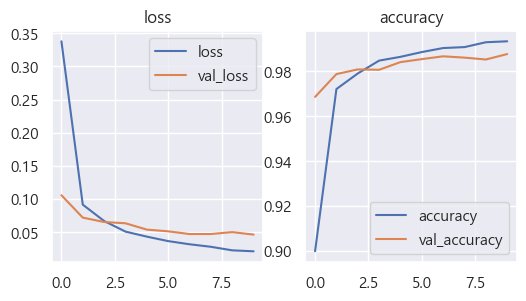

In [23]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 성능비교
<pre>
* FC  total param : 272,270  (60000, 784)
                    [0.08849435299634933, 0.9797000288963318]
* CNN total param :  33,750  (60000, 28,28,1)
                    [0.03190174326300621, 0.9907000064849854]